<a href="https://colab.research.google.com/github/Sehastrajit-clg/Deep-Learning/blob/main/DL_Lab_2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/Colab Notebooks/dl_lab_2

/content/gdrive/My Drive/Colab Notebooks/dl_lab_2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
df = pd.read_csv('train.csv')
df = df.drop('id',axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,4,99,76,15,51,23.2,0.223,21,0
1,0,102,52,0,0,25.1,0.078,21,0
2,3,126,88,41,235,39.3,0.704,27,0
3,5,109,75,26,0,36.0,0.546,60,0
4,4,156,75,0,0,48.3,0.238,32,1
...,...,...,...,...,...,...,...,...,...
595,0,91,68,32,210,39.9,0.381,25,0
596,5,95,72,33,0,37.7,0.370,27,0
597,1,124,60,32,0,35.8,0.514,21,0
598,9,156,86,28,155,34.3,1.189,42,1


In [8]:
X_train=df.drop('label',axis=1).values
y_train=df['label'].values

In [9]:
X_train

array([[4.000e+00, 9.900e+01, 7.600e+01, ..., 2.320e+01, 2.230e-01,
        2.100e+01],
       [0.000e+00, 1.020e+02, 5.200e+01, ..., 2.510e+01, 7.800e-02,
        2.100e+01],
       [3.000e+00, 1.260e+02, 8.800e+01, ..., 3.930e+01, 7.040e-01,
        2.700e+01],
       ...,
       [1.000e+00, 1.240e+02, 6.000e+01, ..., 3.580e+01, 5.140e-01,
        2.100e+01],
       [9.000e+00, 1.560e+02, 8.600e+01, ..., 3.430e+01, 1.189e+00,
        4.200e+01],
       [1.100e+01, 8.500e+01, 7.400e+01, ..., 3.010e+01, 3.000e-01,
        3.500e+01]])

In [10]:
y_train

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.8)

In [12]:
dg = pd.read_csv('test.csv')
dg = dg.drop('id',axis=1)
dg

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,145,0,0,0,44.2,0.630,31
1,2,100,68,25,71,38.5,0.324,26
2,0,95,85,25,36,37.4,0.247,24
3,0,117,66,31,188,30.8,0.493,22
4,6,114,88,0,0,27.8,0.247,66
...,...,...,...,...,...,...,...,...
163,0,104,64,23,116,27.8,0.454,23
164,11,111,84,40,0,46.8,0.925,45
165,1,0,68,35,0,32.0,0.389,22
166,1,103,80,11,82,19.4,0.491,22


In [16]:
X_test=dg.values

In [17]:
X_test

array([[  0.   , 145.   ,   0.   , ...,  44.2  ,   0.63 ,  31.   ],
       [  2.   , 100.   ,  68.   , ...,  38.5  ,   0.324,  26.   ],
       [  0.   ,  95.   ,  85.   , ...,  37.4  ,   0.247,  24.   ],
       ...,
       [  1.   ,   0.   ,  68.   , ...,  32.   ,   0.389,  22.   ],
       [  1.   , 103.   ,  80.   , ...,  19.4  ,   0.491,  22.   ],
       [  2.   , 122.   ,  52.   , ...,  36.2  ,   0.816,  28.   ]])

In [ ]:
y_train

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [19]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)

In [20]:
class AND_Model(nn.Module):
  def __init__(self, input_features=8, hidden1=2, hidden2=2, out_features=2):
    super(AND_Model, self).__init__()
    self.Layer1 = nn.Linear(input_features, hidden1)
    self.Layer2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self, x):
    x = F.tanh(self.Layer1(x))
    y = F.tanh(self.Layer2(x))
    x = self.out(x)
    return x

In [21]:
torch.manual_seed(3)
model= AND_Model()

In [22]:
model.parameters

<bound method Module.parameters of AND_Model(
  (Layer1): Linear(in_features=8, out_features=2, bias=True)
  (Layer2): Linear(in_features=2, out_features=2, bias=True)
  (out): Linear(in_features=2, out_features=2, bias=True)
)>

In [23]:
###backward propagation
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.ASGD(model.parameters(),lr=0.01)

In [24]:
epochs = 200
final_losses = []
for i in range(epochs):
  i = i + 1
  y_pred = model.forward(X_train)
  # Convert y_train to Long data type
  y_train_long = y_train.long()
  loss = loss_function(y_pred, y_train_long)
  final_losses.append(loss.item())
  print("Epochs {} and the loss: {}".format(i, loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs 1 and the loss: 0.7713454961776733
Epochs 2 and the loss: 0.7685801982879639
Epochs 3 and the loss: 0.7661544680595398
Epochs 4 and the loss: 0.7638062834739685
Epochs 5 and the loss: 0.7615113854408264
Epochs 6 and the loss: 0.7592677474021912
Epochs 7 and the loss: 0.7570739984512329
Epochs 8 and the loss: 0.75492924451828
Epochs 9 and the loss: 0.7528325915336609
Epochs 10 and the loss: 0.7507832050323486
Epochs 11 and the loss: 0.748779833316803
Epochs 12 and the loss: 0.746821939945221
Epochs 13 and the loss: 0.7449082136154175
Epochs 14 and the loss: 0.7430379390716553
Epochs 15 and the loss: 0.7412100434303284
Epochs 16 and the loss: 0.7394237518310547
Epochs 17 and the loss: 0.7376781702041626
Epochs 18 and the loss: 0.7359722852706909
Epochs 19 and the loss: 0.734305202960968
Epochs 20 and the loss: 0.7326762676239014
Epochs 21 and the loss: 0.7310844659805298
Epochs 22 and the loss: 0.7295291423797607
Epochs 23 and the loss: 0.7280091643333435
Epochs 24 and the loss: 0

Text(0.5, 0, 'Epoch')

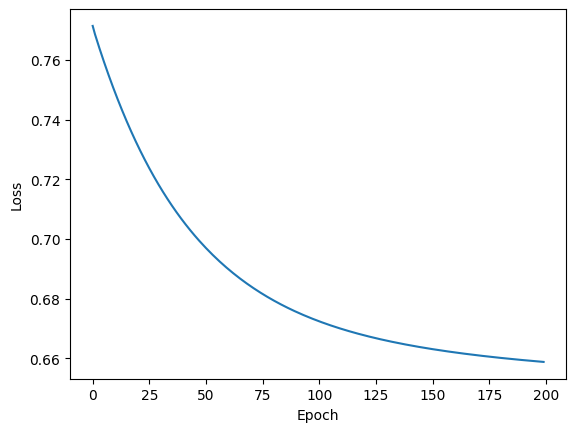

In [25]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [27]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_prod=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
